# Part 1 - Data Preparation and Preprocessing [8 Points]


In [122]:
# IMPORT MODULES
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
# returns the first number in the range so it can be sorted by that value
def RangeCompare(x):
    return int(x.split()[0])

# Custom sort function for the salary ranges
def RangeSort(df_indexes):
    return sorted(df_indexes, key = RangeCompare)

In [123]:
# Perform data preparation and processing
## code
orig_df = pd.read_csv("data.csv")

C:\Users\Miss Squish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [124]:
# drop id, drop duplicates
orig_df = orig_df.drop_duplicates()
orig_df = orig_df.drop(columns='Id')

In [125]:
# take job type from title put in job type column where job type is NaN
jTypes = ['Casual', 'Part Time', 'Full Time']
edited = 0

for index, row in orig_df.iterrows():
    for job in jTypes:
        match = re.match(job, row['Title'], re.IGNORECASE)
        
        if match is not None:
            # Replace the job type from the title
            orig_df.at[index, 'Title'] = row['Title'].replace(match.group(), '')
            
            # If the row has no job type add it in
            if pd.isnull(row['JobType']):
                if job == 'Casual':
                    orig_df.at[index, 'JobType'] = 'Casual/Vacation'
                else:
                    orig_df.at[index, 'JobType'] = job
            edited += 1
print(edited)
orig_df[['Title', 'JobType']].head()

13670


,Title,JobType
0,Stock Replenisher,Casual/Vacation
1,Stock Replenisher,Casual/Vacation
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,NaN
3,Team member - Belrose,NaN
4,"Business Banking Contact Centre Specialist, Ni...",NaN


In [5]:
# create separate data frames
job_type_df = orig_df[['SubClassification', 'JobType']].copy()
job_type_df = job_type_df.dropna(axis=0, subset=['JobType'])
class_subclass_df = orig_df[['Location', 'Classification', 'SubClassification']].copy()
class_subclass_df.dropna()
# can talk about how actual salary and full description different
salary_df = orig_df[['Location','SubClassification', 'Classification', 'LowestSalary', 'HighestSalary']].copy()
loc_most_paid_df = salary_df.copy().drop(columns=['Classification','SubClassification'])

### 1) Describe the dataset


#### 1.1) What are the categories/domains of the dataset?

#### 1.2) What is dataset structure/format

#### 1.3) What are attributes/features of the data are you going to use?

#### 1.4) Which parts of the dataset will you use or all of them?


### 2) Describe the steps you used for data preparation and preprocessing

[2-3 Paragraphs] 
#### 2.1. How did we load the data?
#### 2.2. How did we normalize the data?
#### 2.3. How did we clean the data?
- Can talk about initial insights about $ salary differences in data and job type inconsistences

### 3) What is your hypothesis about the analysis outcome?

[1-2 paragraphs] This our hypothesis

# Part 2 - Data Analysis and Interpretation [17 points]

- Perform exploratory data analysis
- Perform statistical data analysis
- Perform predictive data analysis

In [6]:
## CODE
## Perform predictive on where the job market will be in x years

### 1) Study the job metadata. Extract the relevant information to describe the job's attributes.

#### 1.1 What is the sector, sub-sector of each job?

#### 1.2 Where is the location of the job?
// maybe CBD vs inner suburbs vs other
#### 1.3 Which is the range of salaries for each job? 

[1-2 paragraphs]

In [ ]:
salary_df['SalaryRange'] = '0' 
for index, row in salary_df.iterrows():
    salary_df.at[index, 'SalaryRange'] = str(row['LowestSalary']) + \
                                            ' - ' + str(row['HighestSalary'])
    
salary_df = salary_df.drop(columns=['LowestSalary', 'HighestSalary'])
salary_df.head()
salary_location_df = salary_df.copy()
salary_df = salary_df.drop(columns=['Location'])

In [ ]:
## 1.2 Where is the location of the job?

# Create DF containing counts of the jobs in each city grouped by their classification
loc_class_count_df = class_subclass_df.groupby(['Location', 'Classification']).count(
                        ).rename(columns = {'SubClassification' : 'Number of Jobs'})

# Access a particular cities job information, if n given top n jobs returned based on counts
def CityData(lc_df, city, n = 0):
    if n == 0:
        return lc_df.loc[city, :]
    else:
        return lc_df.loc[city, :].nlargest(n, 'Number of Jobs')


lc_df = CityData(loc_class_count_df, 'Brisbane', 5)
lc_df.head()

In [85]:
salary_count_df = salary_df.groupby(['SubClassification', 'SalaryRange']).count(
                    ).rename(columns = {'Classification' : 'Number of Jobs'})

salary_count_df.sort_values(by=['SubClassification', 'Number of Jobs'], 
                            ascending=[True, False],  inplace=True)

def SalaryData(sc_df, subclass, n = 0):
    if n == 0:
        return sc_df.loc[subclass, :]
    else:
        return sc_df.loc[subclass, :].nlargest(n, 'Number of Jobs')

SalaryData(salary_count_df, 'Developers/Programmers').head()

,Number of Jobs
SalaryRange,
150 - 200,935
120 - 150,764
0 - 30,694
100 - 120,686
200 - 999,520


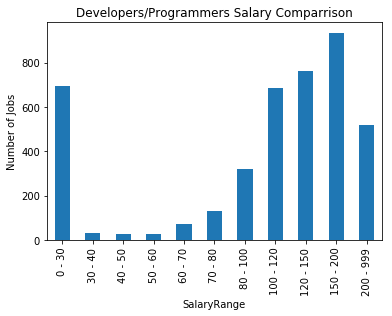

In [10]:
# Plot Developers/Programmers Data
temp_df = SalaryData(salary_count_df, 'Developers/Programmers').sort_values(by=['SalaryRange'])
temp_df = temp_df.reindex(index=RangeSort(temp_df.index))

ax = temp_df.plot.bar(title='Developers/Programmers Salary Comparrison', legend=False)
ax.set_ylabel('Number of Jobs')
ax

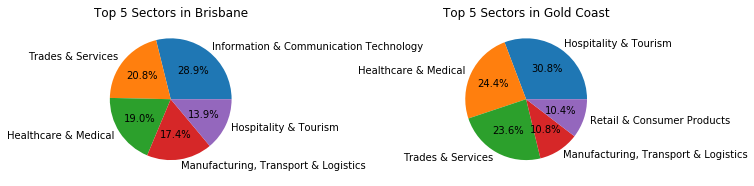

In [11]:
# Graphing a comparison between the top 5 sectors for Gold Coast and Brisbane 
fig1, ax = plt.subplots(1, 2)

ax[0].pie(lc_df['Number of Jobs'], labels=lc_df.index, autopct='%1.1f%%')
ax[0].set_title('Top 5 Sectors in Brisbane')

lc_df2 = CityData(loc_class_count_df, 'Gold Coast', 5)
ax[1].pie(lc_df2['Number of Jobs'], labels=lc_df2.index, autopct='%1.1f%%')
ax[1].set_title('Top 5 Sectors in Gold Coast')

box = ax[1].get_position()
box.x0 = box.x0 + 0.4
box.x1 = box.x1 + 0.4
ax[1].set_position(box)


plt.show()

### 2) Study the job market by locations

#### 2.1 What is the market size in each city? Which are the hottest job sectors in each city?



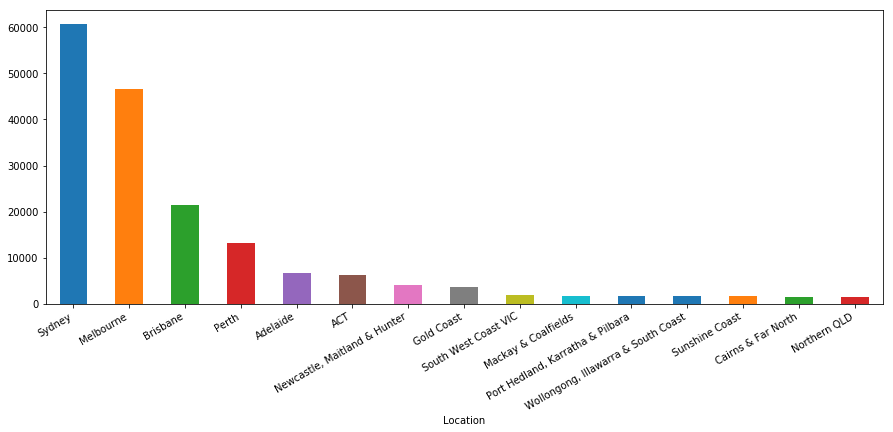

In [12]:
market_size = pd.DataFrame()
market_size['Number of Jobs'] = class_subclass_df.groupby('Location')['Classification'].count()
market_size.head()
f, ax = plt.subplots(figsize=(15, 6))
market_size['Number of Jobs'].sort_values(ascending=False).head(15).plot(kind='bar')
f.autofmt_xdate()
plt.show()

In [13]:
pd.get_option("display.max_rows")
hottest_job_sec = pd.DataFrame()
lowest_job_sec = pd.DataFrame()
lowest_job_sec['Classification'] = class_subclass_df.groupby('Location')['Classification'].min()
lowest_job_sec['SubClassification'] = class_subclass_df.groupby('Location')['SubClassification'].min()
hottest_job_sec['# of Jobs'] = class_subclass_df.groupby(['Location', 'Classification'])['Location'].count()
new_df = pd.DataFrame()
max_val = 0
index = 0
cities = []
classifications = []
max_sector = []
for i in hottest_job_sec.index:
    num = hottest_job_sec['# of Jobs'][i]
    if num > max_val:
        max_val = num
        city = i[0]
        class_type = i[1]
    if i[0] != city:
        cities.insert(index, city)
        classifications.insert(index, class_type)
        max_sector.insert(index, max_val)
        index += 1
        max_val = 0
        
new_df.head()
new_df['Location']  = cities
new_df['Classification'] = classifications
new_df['#'] = max_sector
new_df.head(10)

,Location,Classification,#
0,ACT,Information & Communication Technology,2057
1,Adelaide,Trades & Services,819
2,Adelaide Hills & Barossa,Hospitality & Tourism,33
3,Albany & Great Southern,Healthcare & Medical,24
4,Albury Area,Healthcare & Medical,89
5,Alice Springs & Central Australia,Healthcare & Medical,59
6,Bairnsdale & Gippsland,Education & Training,71
7,Ballarat & Central Highlands,Healthcare & Medical,111
8,"Bendigo, Goldfields & Macedon Ranges",Healthcare & Medical,146
9,Brisbane,Information & Communication Technology,2768


#### 2.2 Which range of salary is common on each city? Where are the employees more well-paid?

In [14]:
salary_location_df = salary_location_df.drop(columns=['SubClassification', 'Classification'])

In [15]:
salary_range_count = pd.DataFrame()
salary_range_count['#'] = salary_location_df.groupby(['Location', 'SalaryRange'])['SalaryRange'].count()
salary_loc_count = pd.DataFrame()
salary_range = []
common_range = []
locations = []
def get_most_common(df, df_col, ls1, ls2, ls3):
    max_val = 0
    index = 0
    for i in df.index:
        num = df[df_col][i]
        if num > max_val:
            max_val = num
            city = i[0]
            sal_range = i[1]
        if i[0] != city:
            ls1.insert(index, sal_range)
            ls2.insert(index, max_val)
            ls3.insert(index, city)
            index += 1
            max_val = 0
get_most_common(salary_range_count, '#', salary_range, common_range, locations)        
salary_loc_count['Location'] = locations
salary_loc_count['SalaryRange'] = salary_range
salary_loc_count.head(20)

,Location,SalaryRange
0,Adelaide,0 - 30
1,Adelaide Hills & Barossa,40 - 50
2,Albury Area,0 - 30
3,Brisbane,0 - 30
4,Bunbury & South West,0 - 30
5,Cairns & Far North,0 - 30
6,Coffs Harbour & North Coast,0 - 30
7,Darwin,0 - 30
8,Dubbo & Central NSW,0 - 30
9,Far West & North Central NSW,100 - 120


In [16]:
sorted_df = loc_most_paid_df.groupby(['Location', 'LowestSalary', 'HighestSalary'])['HighestSalary'].count()
sorted_df.head(20)

Location  LowestSalary  HighestSalary
ACT       0             30               1071
          30            40                406
          40            50                453
          50            60                315
          60            70                379
          70            80                502
          80            100               391
          100           120               537
          120           150               509
          150           200               976
          200           999               711
Adelaide  0             30               1256
          30            40                619
          40            50               1007
          50            60                718
          60            70                734
          70            80                563
          80            100               445
          100           120               476
          120           150               321
Name: HighestSalary, dtype: int64

#### 2.3 Can you detect the pattern of posting: e.g. are more jobs posted at the beginning of the month?

In [66]:
postings_df = orig_df[['Date']].copy()
postings_df['Date'] = postings_df['Date'].apply(lambda x: x.strip('T00:00:00.000Z'))
pd.to_datetime(postings_df['Date'],format='%Y-%m-%d')
avg_postings_df = postings_df.copy()
postings_df['Day of Month'] = pd.DatetimeIndex(postings_df['Date']).day
postings_df = postings_df.drop(columns=['Date'])
postings_df = postings_df.groupby(['Day of Month'])['Day of Month'].count().reset_index(name='Postings').sort_values(['Postings'], ascending=False)
print(postings_df)

    Day of Month  Postings
0              1     24512
2              3     21804
1              2     18585
10            12     17503
3              4     16728
16            18     16151
8              9     15822
15            17     15539
9             11     15448
4              5     15028
11            13     14793
12            14     14656
18            21     13684
6              7     11309
19            22     10950
27            31     10652
13            15     10132
7              8      9276
17            19      8720
14            16      8332
5              6      6984
26            29      5946
24            27      3557
25            28      3225
23            26      2820
21            24      2542
22            25      2015
20            23      1764


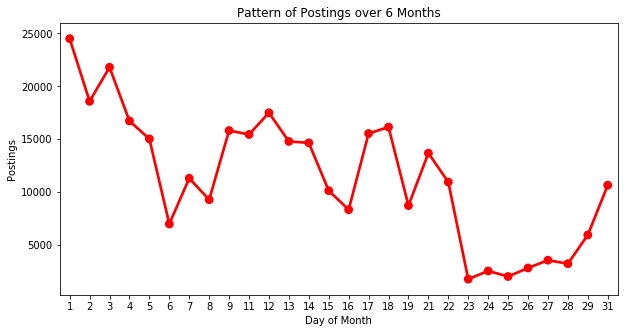

In [21]:
f, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x='Day of Month', y='Postings', data=postings_df, color='r').set_title('Pattern of Postings over 6 Months')
plt.show()

In [70]:
avg_postings_df['Month'] = pd.DatetimeIndex(avg_postings_df['Date']).month
avg_postings_df['Day'] = pd.DatetimeIndex(avg_postings_df['Date']).day
avg_postings_df = avg_postings_df.groupby(['Month', 'Day'])['Month'].count().groupby(['Day']).mean().reset_index(name='Average Postings').sort_values(['Average Postings'], ascending=False)
avg_postings_df.head()

,Day,Average Postings
0,1,4085.333333
1,2,3717.000000
2,3,3634.000000
27,31,3550.666667
16,18,3230.200000


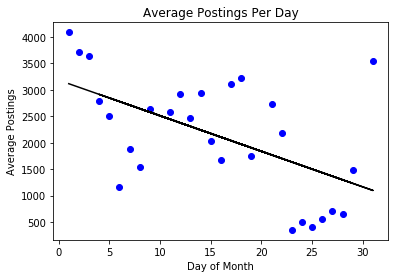

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
# Apply linear regression with the 'postings' feature to predict posting trend
model = LinearRegression()
y = avg_postings_df['Average Postings'].values
X = avg_postings_df[['Day']]

model.fit(X, y)
y_pred = model.predict(X)
posting_score = model.score(X, y)
plt.xlabel('Day of Month')
plt.ylabel('Average Postings')
plt.scatter(X, y, color='b')
plt.title('Average Postings Per Day')
plt.plot(X, y_pred, color='black')

[1-2 paragraphs]
- There are no postings on the 10th, 20th and 30th day of the month
- First three days of the month are the most popular, with the first day being the most frequent

### 3) Study the market by sectors 

#### 3.1 Which sectors keep the highest market share?

#### 3.2 In each sector, which sub-sectors are the main spotlights?

#### 3.3 What is the salary range for each sector/sub-sector? Can you compare salary range between sectors/subsectors?

#### 3.4 What is the trending of market i.e. if a high school student asked you which subject should he/she learn in university (to guarantee a job in the future), what is your advice?

In [130]:
subclass_df = orig_df[['Date','SubClassification']].copy()
top5 = subclass_df.groupby(['SubClassification'])['SubClassification'].count().sort_values(ascending=False).head(6)
subclass_df['Month'] = subclass_df['Date'].apply(lambda x: x.strip('T00:00:00.000Z'))
pd.to_datetime(subclass_df['Month'], format='%Y-%m-%d')
subclass_df['Month'] = pd.DatetimeIndex(subclass_df['Month']).month
#subclass_df = subclass_df.drop(columns=['Date'])
subclass_df = subclass_df.groupby(['SubClassification', 'Month'])['SubClassification'].count().reset_index(name='Postings').sort_values(['Postings'], ascending=False)
print(top5)

SubClassification
Other                        11349
Management                    6236
Chefs/Cooks                   4600
Administrative Assistants     4572
Developers/Programmers        4211
Retail Assistants             3902
Name: SubClassification, dtype: int64


In [150]:
#subclass_df = subclass_df[subclass_df.Month != 3]
ls = ['Management', 'Chefs/Cooks', 'Administrative Assistants',
                                                     'Developers/Programmers', 'Retail Assistants']
subclass_df[subclass_df['SubClassification'].isin(ls)]
management_df = subclass_df[subclass_df['SubClassification'] == 'Management']

[3708, 1329, 1199, 1488.8999999999999]


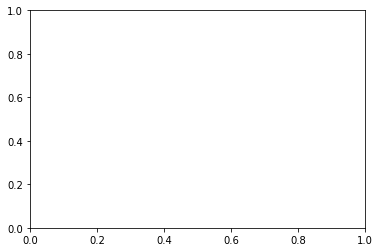

In [155]:
# Using moving average
def movingAvg(data, n):
    pred = data[:]
    for i in range(0, n):
        x_1 = pred[-1] * 0.6
        x_2 = pred[-2] * 0.3
        x_3 = pred[-3] * 0.1
        avg = (x_1 + x_2 + x_3)
        pred.append(avg)
    return pred

f, ax = plt.subplots(1, 1)
mv_avg_df = movingAvg(list(management_df['Postings'].values), 1)
print(mv_avg_df)
#ma_df = moving_average(subclass_df, 4, 6)
#sns.pointplot(x='Month', y='Postings', data=subclass_df, color='b')
#sns.pointplot(x='Month', y='Postings', data=ma_df, color='g')
#ax.legend(handles=ax.lines[::len(subclass_df)+1], labels=["Actual", "3-MA"])
#plt.show()

#### 3.5 Can you detect which skills are required in each sector?

### 4) Visualize the results on an interactive web page
- Trend analysis: visualize number of jobs by locations, by sectors, etc
- Compare between locations or sectors about the number of jobs, the salary, etc.
- Present the necessary skills by sectors, by subsectors

#### 5) Using PySpark for your data analysis [2 points]

# Part 3 - Evaluation [5 Points]

### Part 1) What are the findings of your data analytics?
[2-3 paragraphs, 2 points]

### Part 2) What actions for balancing the markets do you suggest based on your findings?
[1-2 paragraphs, 1 point]

### Part 3) How could you refine your data analytics? [1-2 paragraphs]

#### 3.1 Could you use different data sources?

#### 3.2 Could you choose different parameters?

#### 3.3 Could you choose other techniques?

#### 3.4 Can you think of ways to obtain more relevant data?

### Part 4) Are there any implications for employers and employees based on the findings you obtained? Justify answer. [1-2 paragraphs]
- Answer

#### Part 5) Present and visualize your data story on an online Web Page [OPTIONAL - up to 5 bonus points]
- Publish on Google Cloud or github.io